## feature engineering

In [17]:
from sklearn.datasets import load_iris
dataset = load_iris()

In [18]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [19]:
import pandas as pd

In [65]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [75]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Correlation matrix
corr_matrix = df.corr()
corr_matrix


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


Step 2: Set Correlation Threshold

In [69]:
# Set correlation threshold (e.g., 0.7)
threshold = 0.7

Step 3: Identify Highly Correlated Columns

In [70]:
# Get highly correlated columns (absolute correlation > threshold)
highly_correlated_cols = []
for i in range(len(corr_matrix.columns)):
    # print(i)
    # print('y')
   
    for j in range(i):
        # print(j)
        # print('x')
        # print(i,j, end="")
        # print(corr_matrix.iloc[i, j])
        if abs(corr_matrix.iloc[i, j]) > threshold:
            highly_correlated_cols.append(corr_matrix.columns[i])

In [57]:
highly_correlated_cols

['petal length (cm)', 'petal width (cm)', 'petal width (cm)']

In [63]:
# Drop highly correlated columns
df.drop(columns=highly_correlated_cols, inplace=True)

In [64]:
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [95]:
df_target = pd.DataFrame(dataset.target,columns=['target'])

In [96]:
df_target

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [105]:
df = pd.concat([df,df_target],axis=1)

In [106]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [103]:
# df.drop('target',axis=1,inplace=True)

In [92]:
# df = pd.merge(df,df_target,on=)

AttributeError: 'DataFrame' object has no attribute 'append'

In [107]:
# Drop columns with correlation > threshold
df.drop(columns=[col for col in df.columns if df[col].corr(df['target']) > threshold], inplace=True)

In [108]:
df

,sepal width (cm)
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4


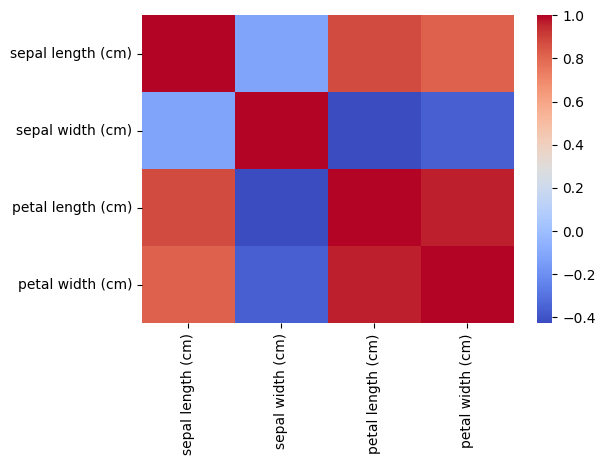

In [26]:
# Visualize correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, cmap='coolwarm') # annot = True  label heatmap
plt.show()

Mutual Information

In [27]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression


In [28]:
# For classification problems
mutual_info = mutual_info_classif(df, dataset.target) 

In [29]:
# For regression problems
# mutual_info = mutual_info_regression(df.drop('target', axis=1), df['target'])


In [30]:
mutual_info

array([0.49751127, 0.31295872, 0.98025595, 0.9999654 ])

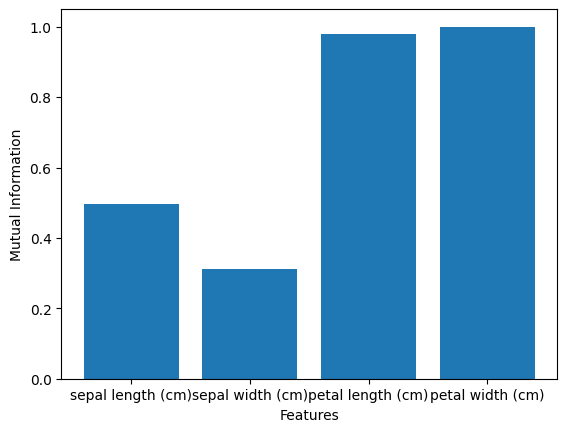

In [31]:
# Plot mutual information
plt.bar(df.columns, mutual_info)
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.show()

Scatter Plot Matrix

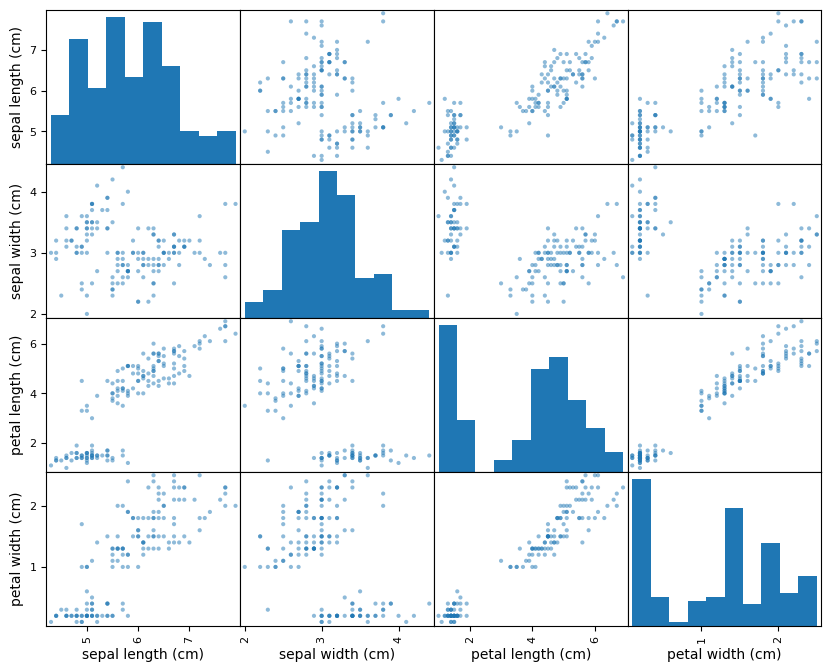

In [33]:

from pandas.plotting import scatter_matrix
# Plot scatter matrix
scatter_matrix(df, figsize=(10, 8))
plt.show()

d:\a27_YEARS_OLD\machine_learning\venv\Lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


<Figure size 1000x800 with 0 Axes>

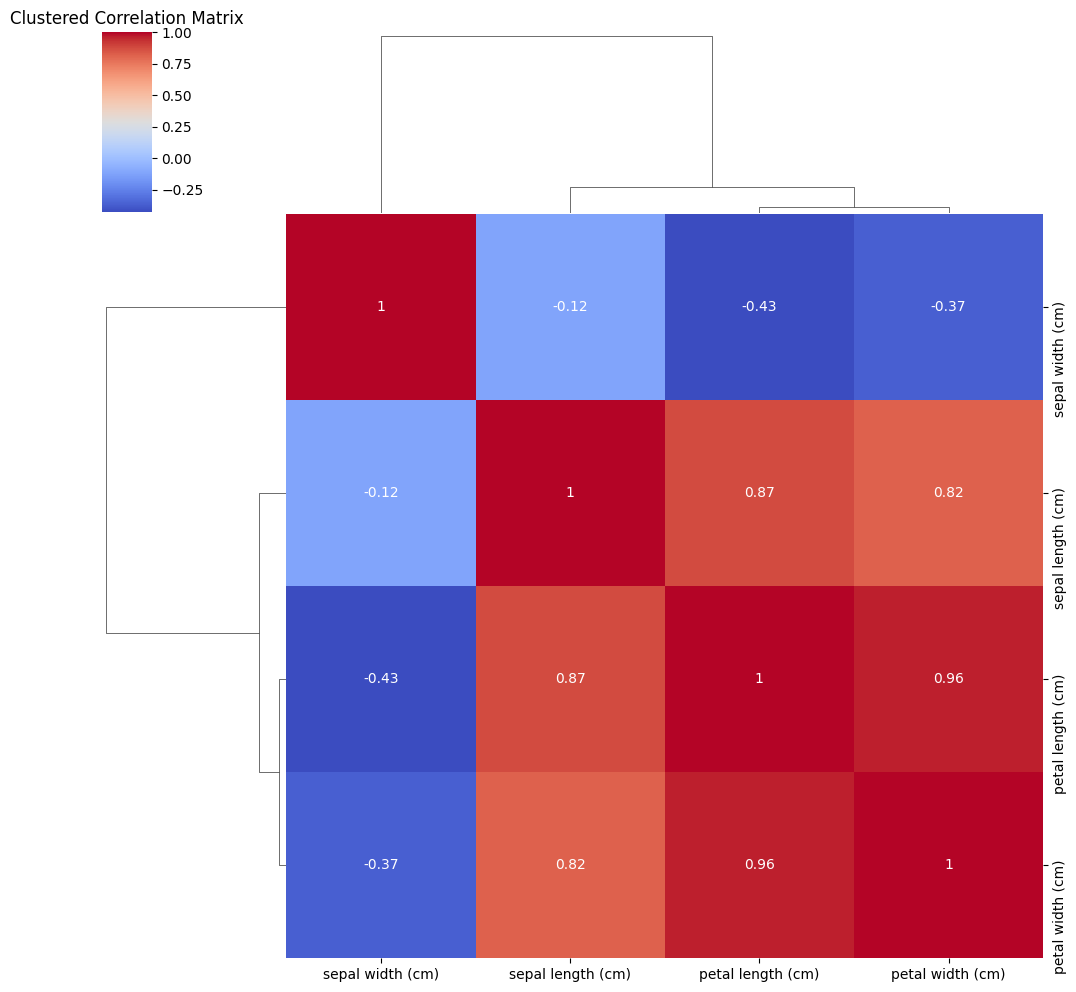

In [41]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot clustered heatmap
plt.figure(figsize=(10, 8))
sns.clustermap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Clustered Correlation Matrix')
plt.show()

In [44]:

import plotly.express as px

In [47]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot interactive heatmap
fig = px.imshow(corr_matrix, text_auto=True)
fig.update_layout(title='Interactive Correlation Matrix')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Correlation Bar Chart

In [35]:
df_target = pd.DataFrame(dataset.target)

In [37]:
df_target.head()

,0
0,0
1,0
2,0
3,0
4,0


In [38]:
# Calculate correlation with target variable
corr_with_target = df.corrwith(df_target)


In [39]:
corr_with_target

0                   NaN
petal length (cm)   NaN
petal width (cm)    NaN
sepal length (cm)   NaN
sepal width (cm)    NaN
dtype: float64

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (5,).

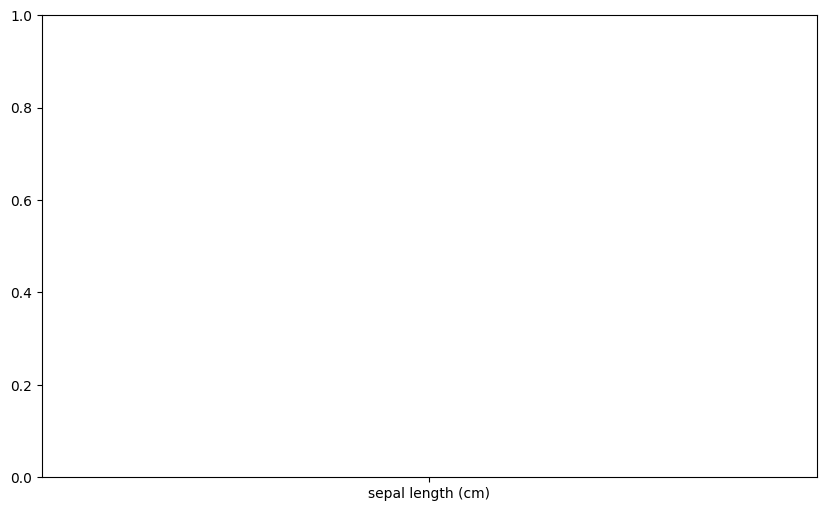

In [40]:

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(df.columns, corr_with_target)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Correlation Bar Chart')
plt.show()

d:\a27_YEARS_OLD\machine_learning\venv\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning:

Found n_features_to_select=5 > n_features=4. There will be no feature selection and all features will be kept.

d:\a27_YEARS_OLD\machine_learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



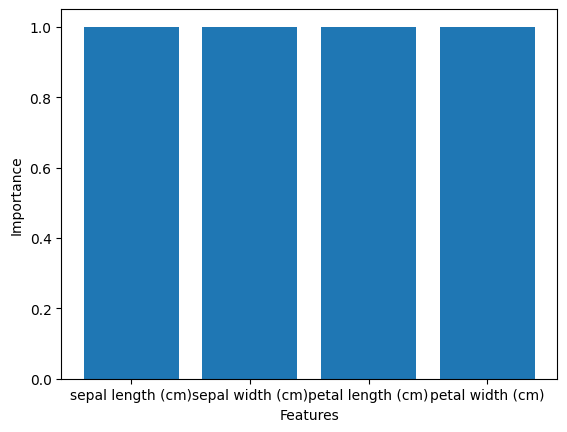

In [48]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize RFE with Logistic Regression
rfe = RFE(LogisticRegression(), n_features_to_select=5)

# Fit RFE
rfe.fit(df, dataset.target)

# Get feature importance
feature_importance = rfe.ranking_

# Plot feature importance
plt.bar(df.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

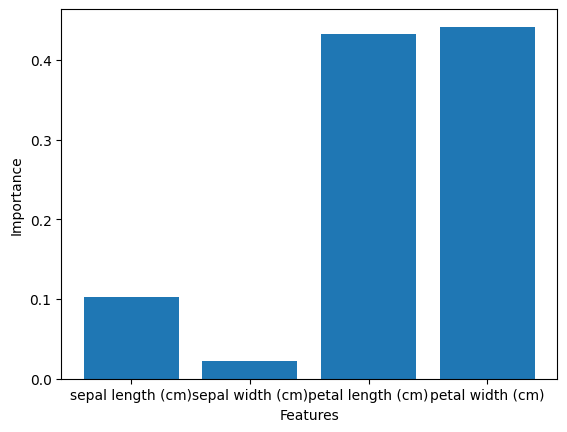

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)

# Fit Random Forest
rf.fit(df, dataset.target)

# Get feature importance
feature_importance = rf.feature_importances_

# Plot feature importance
plt.bar(df.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

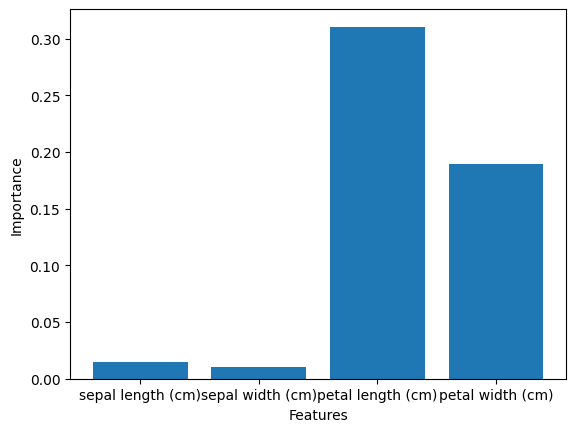

In [51]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)

# Fit Random Forest
rf.fit(df, dataset.target)

# Get permutation importance
permutation_importance = permutation_importance(rf, df, dataset.target)

# Plot permutation importance
plt.bar(df.columns, permutation_importance.importances_mean)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [ ]:
# Drop features with low importance
threshold = 0.1
df = df.drop(columns=[col for col, importance in zip(df.columns, feature_importance) if importance < threshold])